In [32]:
#RQ2: loss analisys results!

"""EXPERIMENTAL RESULT FILES
RQ1_all_losses_race_sex.csv
- 40 runs of bias mit with mult attrs!!
- only valid for compas as for adult the EN kept erroring!!

RQ1_all_losses_race.csv, RQ1_all_losses_sex.csv
- 20 runs of compas, 16 of adult
- has also german which should be ignored
- does not use all metrics
- these tests should be rerun at the end for all metrics

RQ1_all_losses_v2_race.csv, RQ1_all_losses_v2_sex.csv
- same setup but more metrics
- remaining 20x compas and 24x adult




16  bias mit
7 ml models
40 it

= 4480

per ml model 16*40 = 640
per bias mit  7*40 = 280

it length 16*7 = 112

WITHOUT EN:
per bias mit  6*40 = 240



ADULT SEX RACEEE not complete


ADULT SEX ???? 44???
COMPAS SEX RACEEE???? 41???
"""


'EXPERIMENTAL RESULT FILES\nRQ1_all_losses_race_sex.csv\n- 40 runs of bias mit with mult attrs!!\n- only valid for compas as for adult the EN kept erroring!!\n\nRQ1_all_losses_race.csv, RQ1_all_losses_sex.csv\n- 20 runs of compas, 16 of adult\n- has also german which should be ignored\n- does not use all metrics\n- these tests should be rerun at the end for all metrics\n\nRQ1_all_losses_v2_race.csv, RQ1_all_losses_v2_sex.csv\n- same setup but more metrics\n- remaining 20x compas and 24x adult\n\n\n\n\n16  bias mit\n7 ml models\n40 it\n\n= 4480\n\nper ml model 16*40 = 640\nper bias mit  7*40 = 280\n\nit length 16*7 = 112\n\nWITHOUT EN:\nper bias mit  6*40 = 240\n\n\n\nADULT SEX RACEEE not complete\n\n\nADULT SEX ???? 44???\nCOMPAS SEX RACEEE???? 41???\n'

In [33]:
print(16*7)

112


In [34]:

"""
RQ2: how is the bias mitigation????

lol literally outperforms everything in all metrics with some small exceptions
outperforms everything for every example for aspd, spd, di, sf


For Adult sex:
horrible predictive performance but 10x better bias than the best debias...... actually not a usable example
For Adult race:
NOTE: for some models the performance loss seems better than others!!!
--- not as different in performance. still bad tho.
- bias much better  than all others for aspd, spd, di, sf
- FM and RW slightly better AEOD (sliiightly)

add a rq abt diff ml models and use:
nn, DT, RF, SVM, NB, LGR
maybe find a reason to remote dt and just 

TODO: checkout results with just nn
"""



"""
Base performance:
nnk, 85%  65% 
lr,  85%  65%
nb,  78%, 64%. could be nice to use if i can
svm  85%  65%

compare performance of diff models
ADUlt race
nnk - <3% acc loss BUT 5% f1
en - <2% but almost 10 f1
Dt - bad
RF, SVM - 3%, bt 10 f1! 
NB - ACC GAIN and smalllll f1 loss
LR - 2% acc, 5% f1
potential: nnk, lr, nb, svm

ADUlt sex
nnk - 5% acc 10% f1 -----------------okay
en - 3.5% acc 30% f1 !!!!!!  HONESTLY WE CAN JUST REMOVE EN 
Dt - 10% CC, 15% f1 BAD
RF-  6% acc 20% BAD
SVM- 4% acc 14% f1 ---------------tolerable
NB - 5% and 7% F1 !!!!!!------------- good
LR -  5% acc 15% -----------------tolerable
potential: 
"""

'\nBase performance:\nnnk, 85%  65% \nlr,  85%  65%\nnb,  78%, 64%. could be nice to use if i can\nsvm  85%  65%\n\ncompare performance of diff models\nADUlt race\nnnk - <3% acc loss BUT 5% f1\nen - <2% but almost 10 f1\nDt - bad\nRF, SVM - 3%, bt 10 f1! \nNB - ACC GAIN and smalllll f1 loss\nLR - 2% acc, 5% f1\npotential: nnk, lr, nb, svm\n\nADUlt sex\nnnk - 5% acc 10% f1 -----------------okay\nen - 3.5% acc 30% f1 !!!!!!  HONESTLY WE CAN JUST REMOVE EN \nDt - 10% CC, 15% f1 BAD\nRF-  6% acc 20% BAD\nSVM- 4% acc 14% f1 ---------------tolerable\nNB - 5% and 7% F1 !!!!!!------------- good\nLR -  5% acc 15% -----------------tolerable\npotential: \n'

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


# SAVE TO RESULTS FILE

In [36]:
def filter_consecutive(df, col, full_count = 16):
    consecutive_count = 1
    last_value = None
    drop_indices = []
    for index, row in df.iterrows():
        if row[col] == last_value:
            consecutive_count += 1
            if consecutive_count == full_count:
                # Mark rows for dropping
                drop_indices.extend(list(range(index - full_count +1, index + 1)))
                consecutive_count = 1
        else:
            consecutive_count = 1
            last_value = row[col]
    print(drop_indices)
    return df.drop(drop_indices)

write = False
if write:
    for attr in [["sex"],["race"],["race", "sex"]]:
        filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
        if len(attr)>1:
            filenames = ["RQ1_all_losses_v2_"]
            
        files = [ os.path.join("results",name +"_".join(attr)+".csv") for name in filenames]
        reader = ResultsReader(files)
        reader.df = reader.df[~(reader.df["data"].str.contains('German'))]
        file_start = os.path.join("RQ2","_".join(attr))
        print(file_start)
        df = reader.get_relative_metrics(use_percent=True)
        full_count = 15
        if len(attr) == 1:
            full_count = 16
        mean_df = filter_consecutive(df, "ML method", full_count)
        #mean_df = df.groupby(reader.filterable).mean().reset_index()
        
        
        mean_df.to_csv(file_start+'_INCOMPLETE_COUNT.csv', index=False)



In [37]:
write = True
if write:
    for attr in [["sex"],["race"],["race", "sex"]]:
        filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
        if len(attr)>1:
            filenames = ["RQ1_all_losses_v2_"]
            
        files = [ os.path.join("results",name +"_".join(attr)+".csv") for name in filenames]
        reader = ResultsReader(files)
        reader.df = reader.df[~(reader.df["data"].str.contains('German')) & (reader.df[reader.ML].str.contains('nn'))]
        file_start = os.path.join("RQ2","_".join(attr))
        print(file_start)
        df = reader.get_relative_metrics(use_percent=True)
        mean_df = df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(file_start+'_nn_mean_change.csv', index=False)
        
        df = reader.get_relative_metrics(use_percent=True)
        mean_df = df.groupby(reader.filterable).std().reset_index()
        mean_df.to_csv(file_start+'_nn_change_std.csv', index=False)
        
        df = reader.get_mean_metrics()
        mean_df = df.groupby(reader.filterable).mean().reset_index()
        mean_df.to_csv(file_start+'_nn_mean_vals.csv', index=False)
        
        df = reader.get_filtered_df()
        mean_df = df.groupby(reader.filterable).std().reset_index()
        mean_df.to_csv(file_start+'_nn_vals_std.csv', index=False)



File 'results\RQ1_all_losses_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_sex.csv' successfully loaded as DataFrame.
RQ2\sex
File 'results\RQ1_all_losses_race.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_race.csv' successfully loaded as DataFrame.
RQ2\race
File 'results\RQ1_all_losses_v2_race_sex.csv' successfully loaded as DataFrame.
RQ2\race_sex


In [44]:
write = True
if write:
    for attr in [["sex"],["race"],["race", "sex"]]:
        print(attr)
        filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
        if len(attr)>1:
            filenames = ["RQ1_all_losses_v2_"]
        files = [ os.path.join("results",name +"_".join(attr)+".csv") for name in filenames]
        reader = ResultsReader(files)
        reader.change_other_to_losses()

        rel_df = reader.get_relative_metrics()
 
        metrics_to_use = ["acc", "prec", "reca", "f1", "A_", "SF", "DI"]
        metrics_to_display = [m for m in reader.metrics if metric_has_substring(m,metrics_to_use )]
        
        for data in ["Adult", "Compas"]: #
            df = rel_df[(rel_df["data"].str.contains(data))]
            
            #df = df[(df["ML method"].str.contains('nn'))]
            df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["other"].str.contains('Sensitive KL loss') ]
           
            counts_total = df[(df["bias mitigation"].str.contains('No'))].groupby(["bias mitigation", "other"]).count()[metrics_to_display]
            c = counts_total["accuracy"].iloc[0]
            print(data," count ", c)
            #result = df.groupby(["bias mitigation", "other"])[metrics_to_display].apply(lambda x: (x > 0).sum()/c).reset_index()
            #result = df.groupby(["bias mitigation", "other", "ML method"])[metrics_to_display].apply(lambda x: (x >= 0).sum()).reset_index()
            result = df.groupby(["bias mitigation", "other"])[metrics_to_display].apply(lambda x: (x >= 0).sum()).reset_index()
            results = pd.concat([result, counts_total])
            
            results.to_csv(os.path.join("RQ_Consistency",'nr_sf_incr_'+data+'_'+"_".join(attr)+'.csv'), index=False)

['sex']
File 'results\RQ1_all_losses_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_sex.csv' successfully loaded as DataFrame.
Adult  count  280
Compas  count  280
['race']
File 'results\RQ1_all_losses_race.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_race.csv' successfully loaded as DataFrame.
Adult  count  280
Compas  count  280
['race', 'sex']
File 'results\RQ1_all_losses_v2_race_sex.csv' successfully loaded as DataFrame.
Adult  count  206
Compas  count  280


In [39]:
# per diff ml model calc the nr of times  for a given metric

write = True
if write:
    for attr in [["sex"],["race"],["race", "sex"]]:
        print(attr)
        
        filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
        if len(attr)>1:
            filenames = ["RQ1_all_losses_v2_"]
        files = [ os.path.join("results",name +"_".join(attr)+".csv") for name in filenames]
        reader = ResultsReader(files)
        reader.change_other_to_losses()

        rel_df = reader.get_relative_metrics()
 
        metrics_to_use = ["SF"]
        metrics_to_display = [m for m in reader.metrics if metric_has_substring(m,metrics_to_use )]
                
        for data in ["Adult", "Compas"]: #
            df = rel_df[(rel_df["data"].str.contains(data))]
            
            df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["other"].str.contains('Sensitive KL loss') ]
            counts_total = df[(df["bias mitigation"].str.contains('No'))].groupby(["bias mitigation", "other"]).count()[metrics_to_display]
            result = df.groupby(["bias mitigation", "other", "ML method"])[metrics_to_display].apply(lambda x: (x >= 0).sum()).reset_index()
            results = pd.concat([result, counts_total])
            
            # Pivot the DataFrame
            pivot_df = results.pivot_table(index=["bias mitigation", "other"], columns='ML method', values=metrics_to_display[0], aggfunc='sum', fill_value=0)            
            pivot_df.to_csv(os.path.join("RQ_Consistency",'PER_MODEL_nr_incr_'+data+'_'+"_".join(attr)+'.csv'), index=True,  index_label=["bias mitigation", "other"])

['sex']
File 'results\RQ1_all_losses_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_sex.csv' successfully loaded as DataFrame.
['race']
File 'results\RQ1_all_losses_race.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_race.csv' successfully loaded as DataFrame.
['race', 'sex']
File 'results\RQ1_all_losses_v2_race_sex.csv' successfully loaded as DataFrame.


# VISUALIZE

In [40]:
attr = 'sex'

filenames = ["RQ1_all_losses_", "RQ1_all_losses_v2_"]
files = [ os.path.join("results",name +attr+".csv") for name in filenames]
reader = ResultsReader(files)
reader.df = reader.df[~(reader.df["data"].str.contains('German')) & (reader.df[reader.ML].str.contains('nn'))]


all_metrics = reader.metrics


for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    

File 'results\RQ1_all_losses_sex.csv' successfully loaded as DataFrame.
File 'results\RQ1_all_losses_v2_sex.csv' successfully loaded as DataFrame.
['Compas Dataset', 'Adult Dataset']
['nn keras']
["['sex']"]
['FYP VAE', 'LFR', 'Reweighing Bias Mitigation', 'FairBalance Bias Mitigation', 'FairMask Bias Mitigation', 'No Bias Mitigation']
['{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1800, latent_dim=17, mask_values=None vae_layers=(100, 75, 50), lr=0.006, \\nlosses_used=[\'Sensitive KL loss\', \'Latent sens ADV loss\', \'Reconstruction loss\', \'KL divergence loss\'])Sensitive KL loss: {\'weight\': 9000, \'sens_col_ids\': [7]}, Latent sens ADV loss: {\'weight\': 0.1, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 16}, Reconstruction loss: {\'weight\': 15}, KL divergence loss: {\'weight\': 0.05}, Flipped ADV loss: {\'weight\': 0.01, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 10, \'sens_col_ids\': [7]}, P

____________________________________________________________________________________________________
Compas Dataset , ['nn keras'] ['sex']


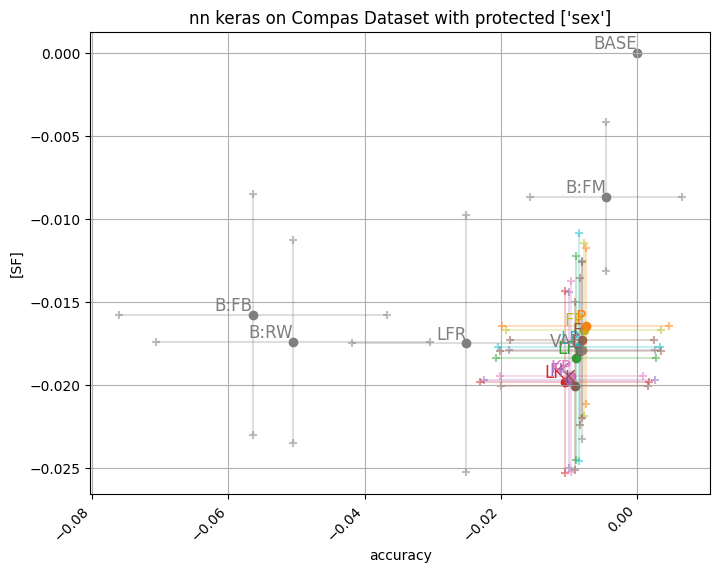

____________________________________________________________________________________________________
Adult Dataset , ['nn keras'] ['sex']


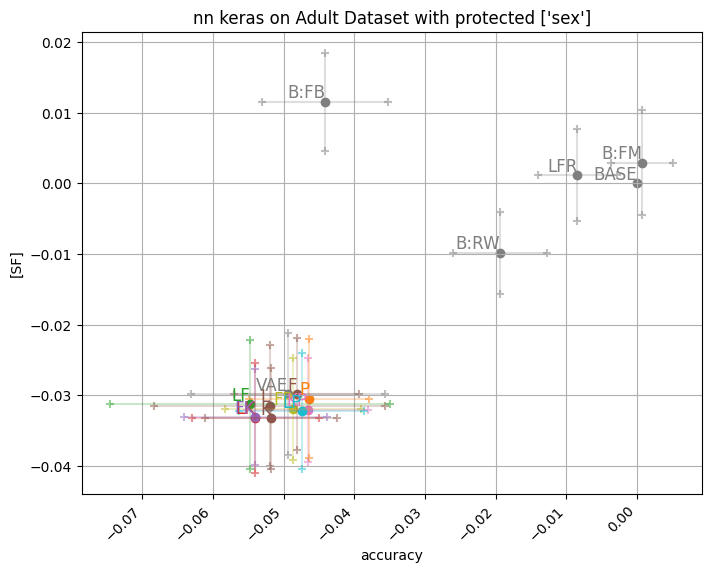

In [41]:
display = True
metrics_to_use = ["SF", "pres"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)]


if display:

    def f(df):
        loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
        loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
        general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
        performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
        #return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
        return df#[~(df["other"].str.contains('LFR'))]
    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.show_legend = False
    grapher.separate_ml_models = False
    grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_2D_STD)



____________________________________________________________________________________________________
Compas Dataset , ['nn keras'] ['sex']
no rows found
____________________________________________________________________________________________________
Adult Dataset , ['nn keras'] ['sex']


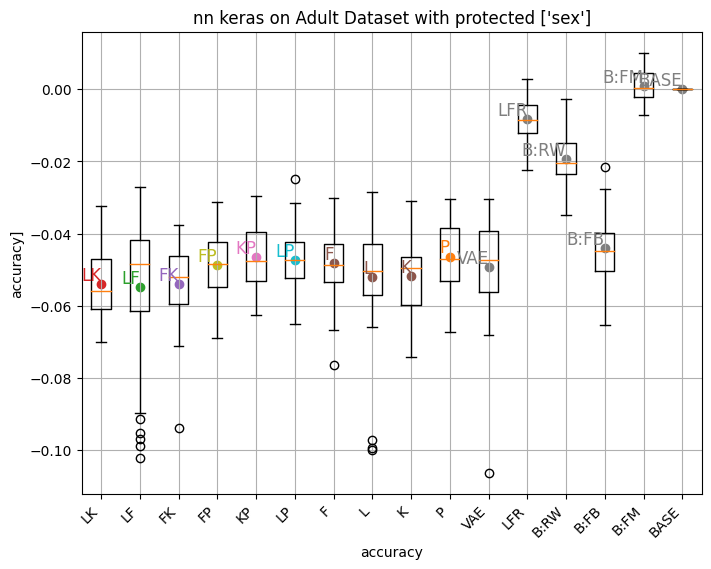

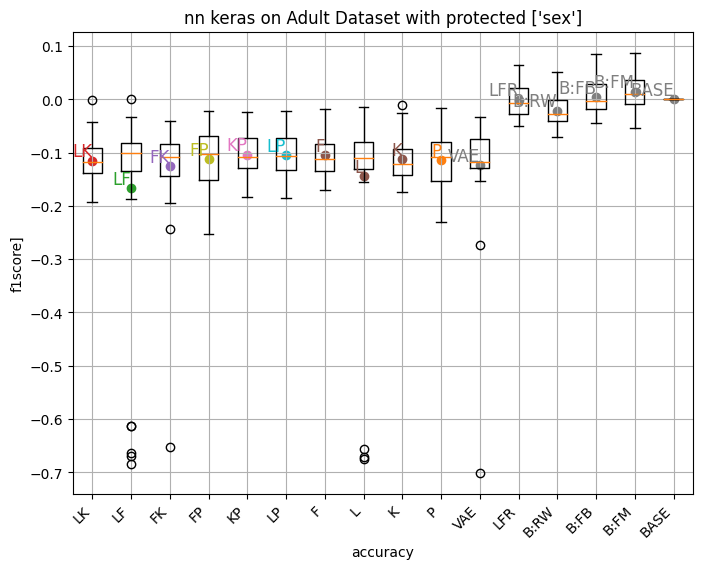

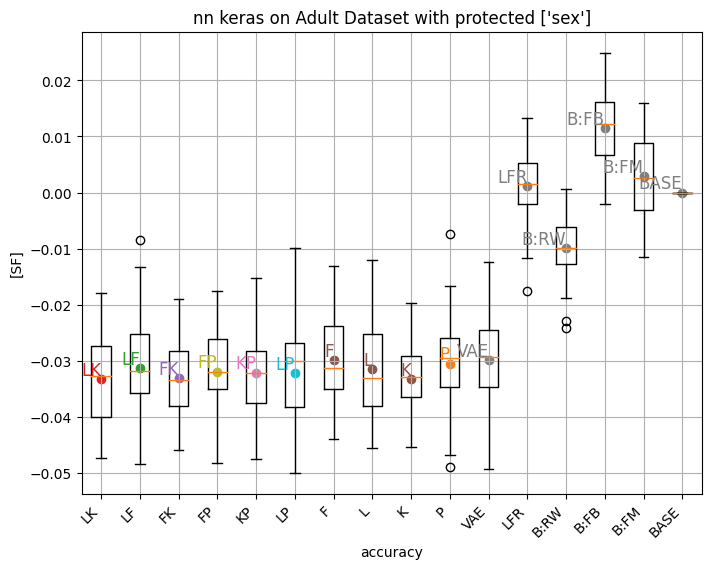

In [42]:
display = True
metrics_to_use = ["SF", "accu", "f1"] 
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)]


if display:
    def f(df):
        return df[(df["data"].str.contains('Adult'))]#[~(df["other"].str.contains('LFR'))]

    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.show_legend = False
    grapher.separate_ml_models = True
    #grapher.plot_metrics_vs_metric(mean=False, relative=False, metrics = metrics_to_display, metric = Metrics.MEAN_Y)
    grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_IQR)
